In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
sales_data = pd.read_csv('train.csv')

In [3]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_data.isna().sum()/len(sales_data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# EDA

### 1.Item_Identifier

In [6]:
sales_data['Item_Identifier'].nunique()

1559

### 2.Item_Weight

In [18]:
sales_data['Item_Weight'].isna().sum()
sales_data['Item_Weight'].mean()

12.857645184135976

In [16]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(),inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot: >

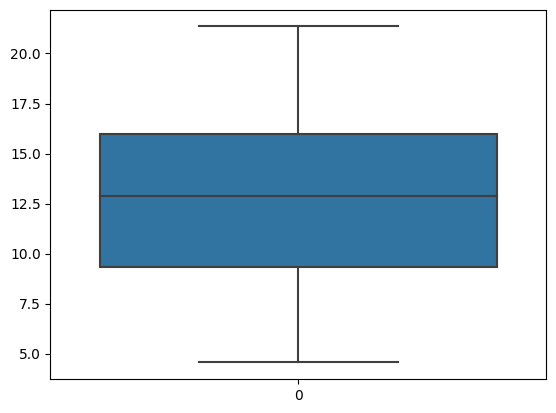

In [52]:
sns.boxplot(sales_data['Item_Weight'])

### 3.Item_Fat_Content

In [7]:
sales_data['Item_Fat_Content'].value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [8]:
sales_data['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1, 'LF': 0, 'reg': 1, 'low fat': 0},inplace = True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot: >

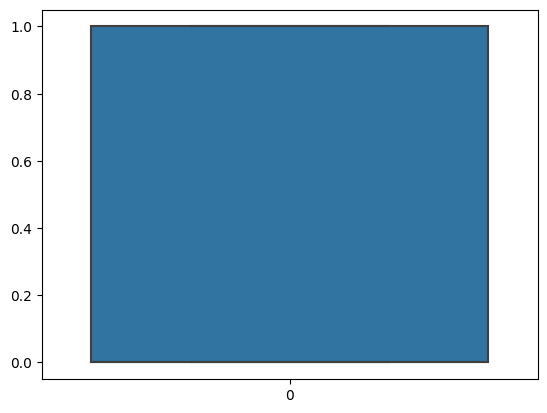

In [53]:
sns.boxplot(sales_data['Item_Fat_Content'])

### 4.Item_Visibility

In [20]:
sales_data['Item_Visibility'].isna().sum()

0

<AxesSubplot: >

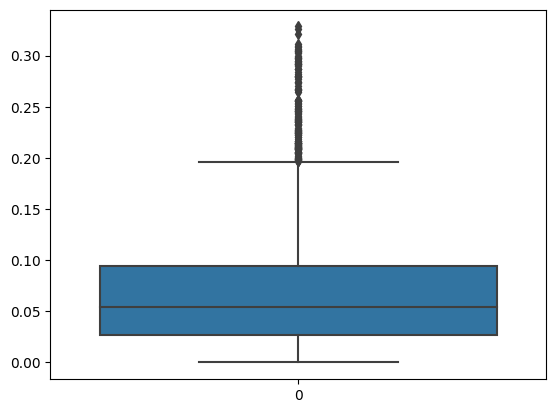

In [54]:
sns.boxplot(sales_data['Item_Visibility'])

In [62]:
sales_data['Item_Visibility'].mean()

0.06613202877895108

In [63]:
sales_data['Item_Visibility']= np.where(sales_data['Item_Visibility']>0.20,sales_data['Item_Visibility'].median(),sales_data['Item_Visibility'])
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,2,3,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,2,1,1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,2,3,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,3,3,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,3,3,1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,2,2,1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,1,2,1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,2,3,2,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot: >

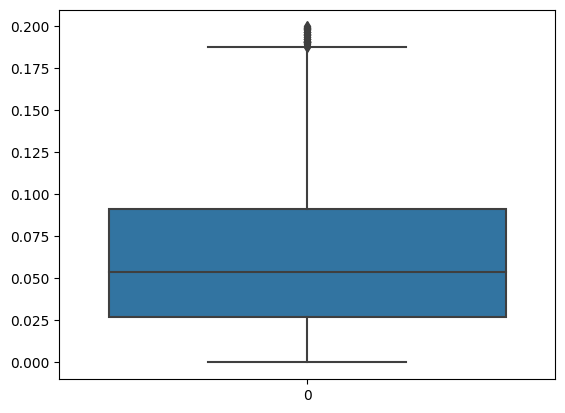

In [64]:
sns.boxplot(sales_data['Item_Visibility'])

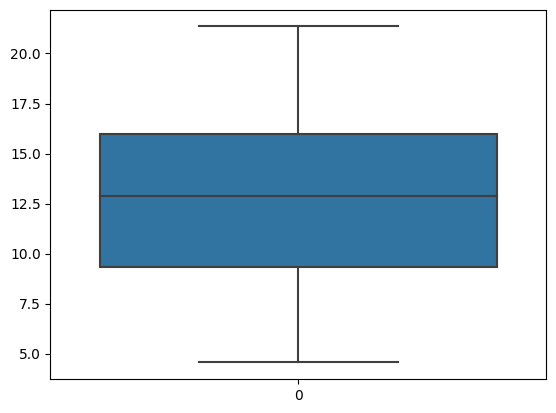

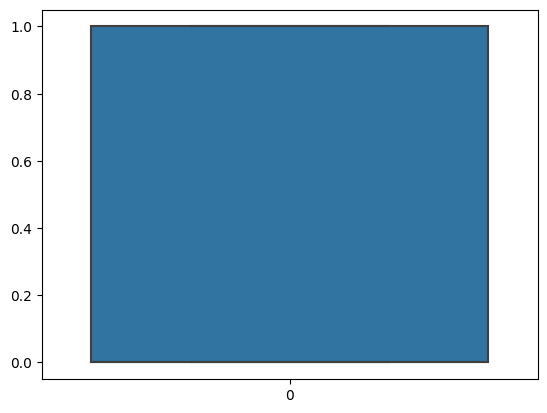

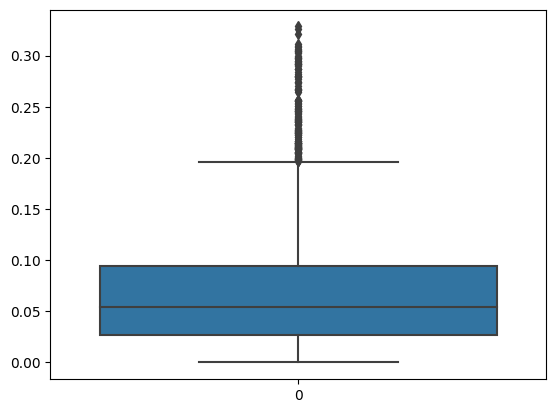

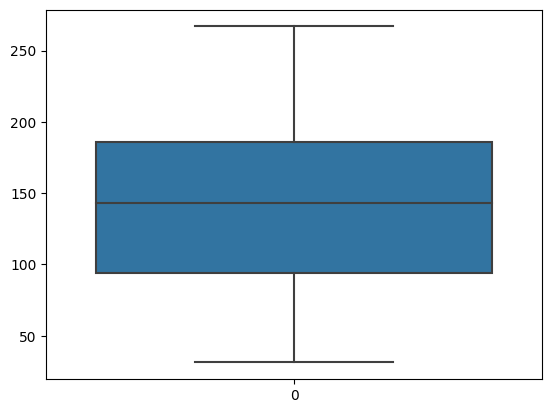

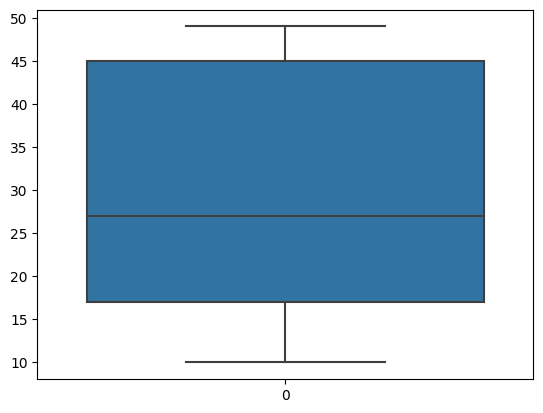

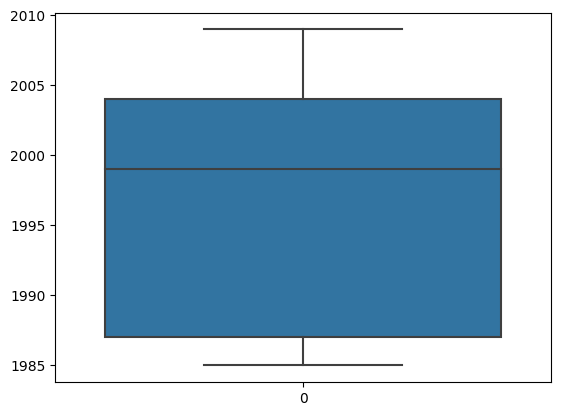

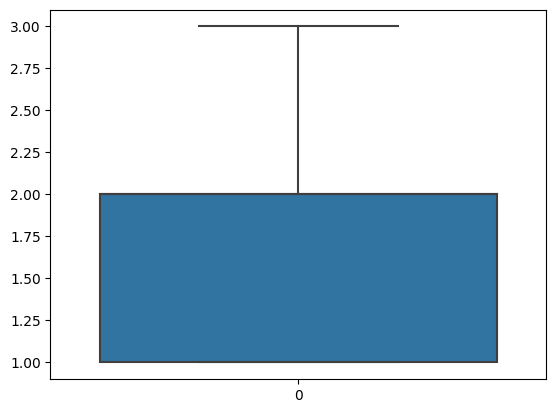

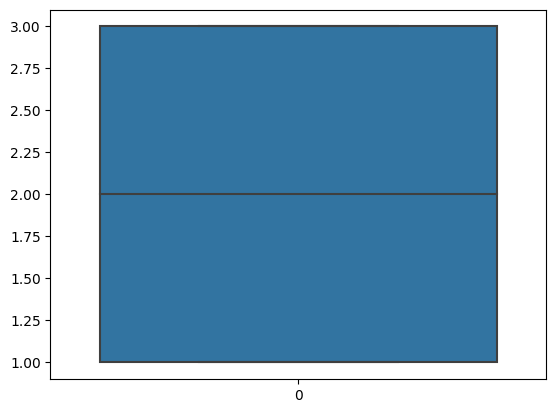

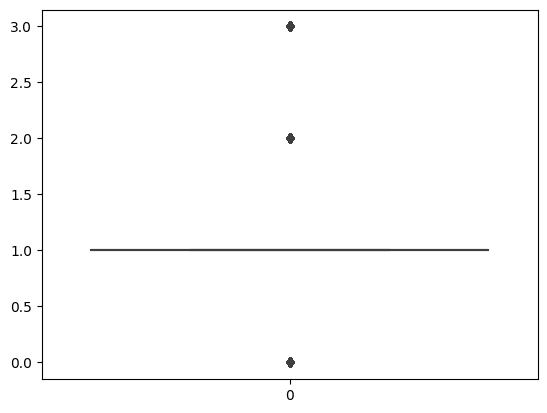

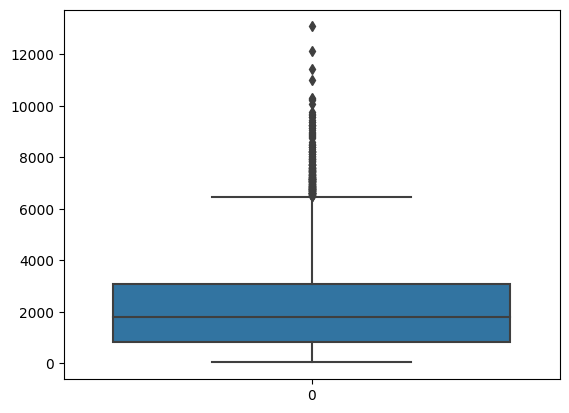

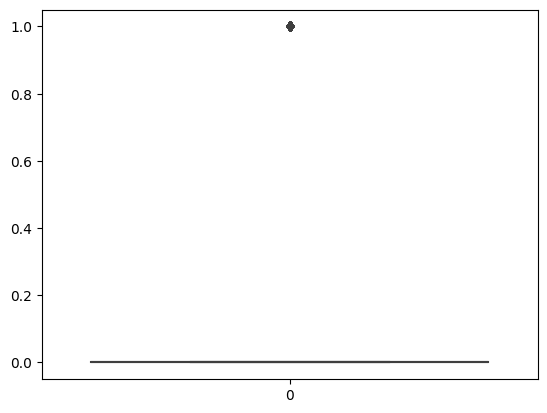

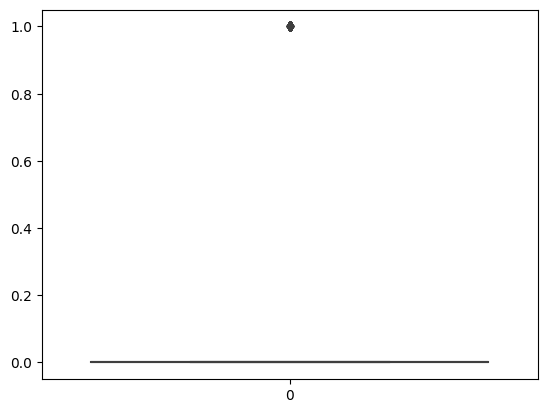

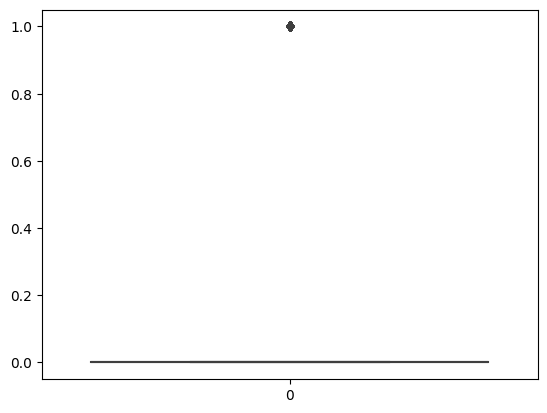

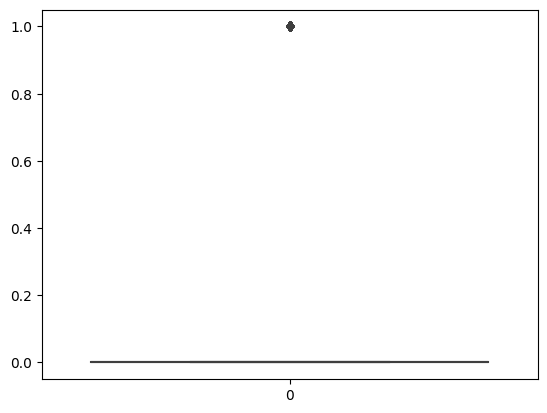

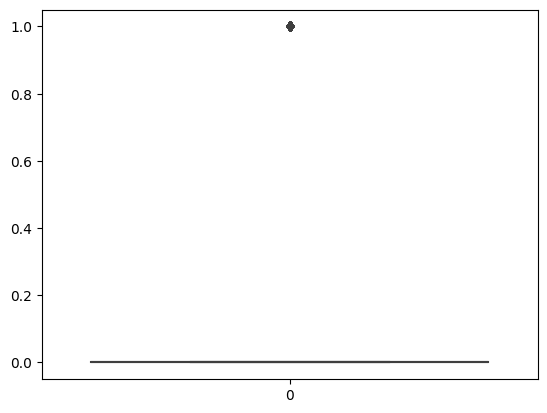

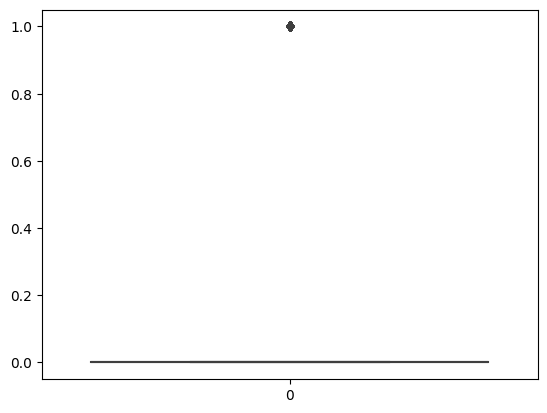

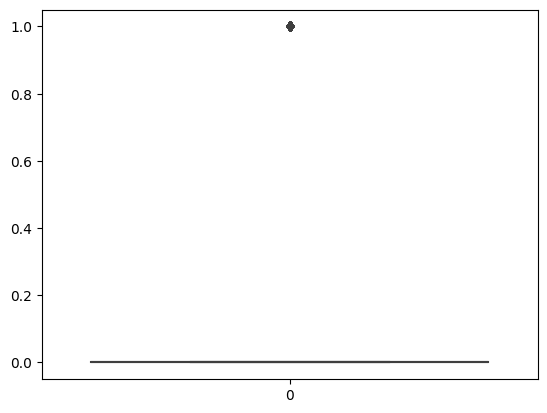

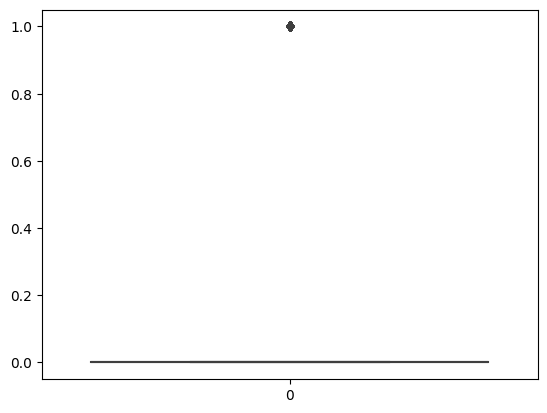

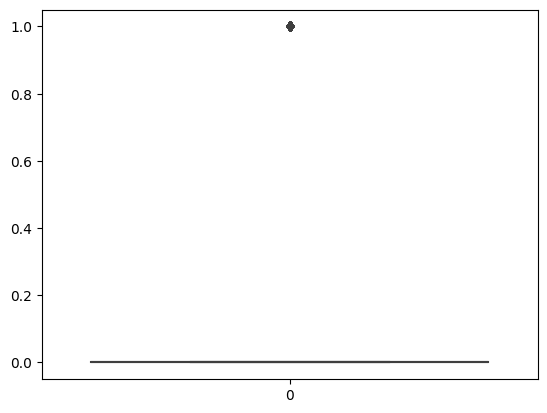

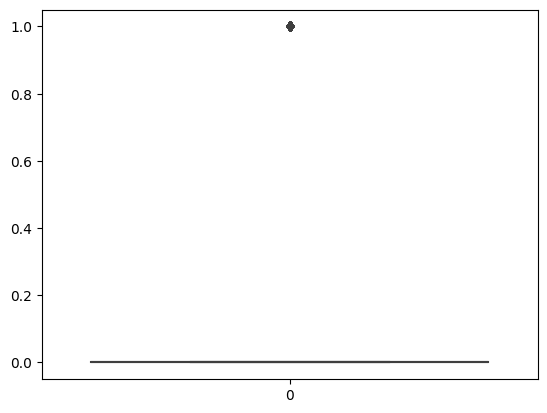

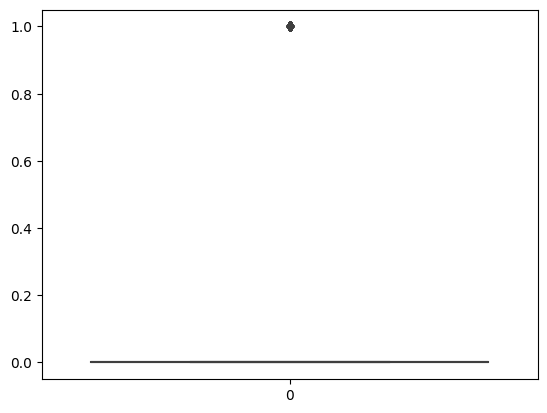

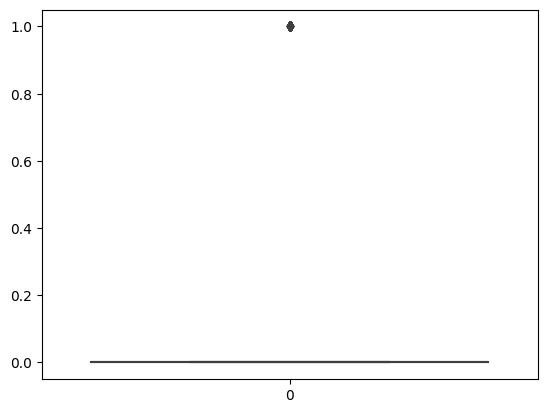

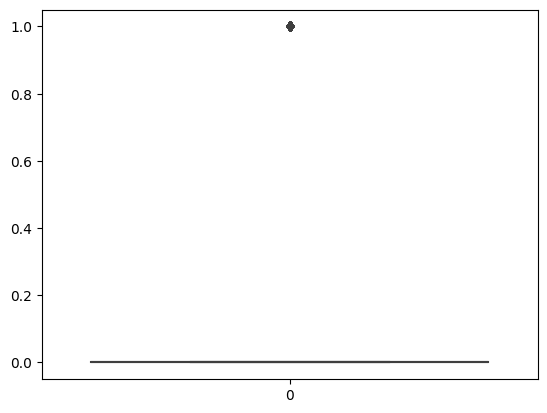

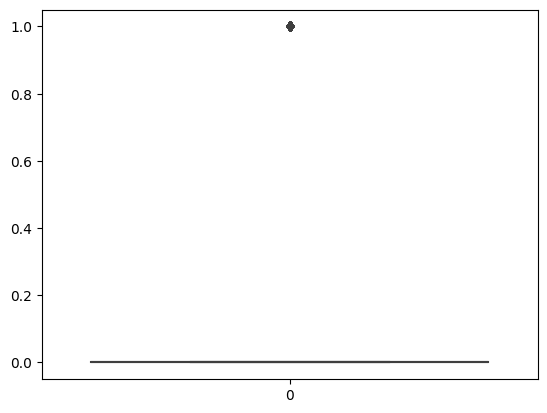

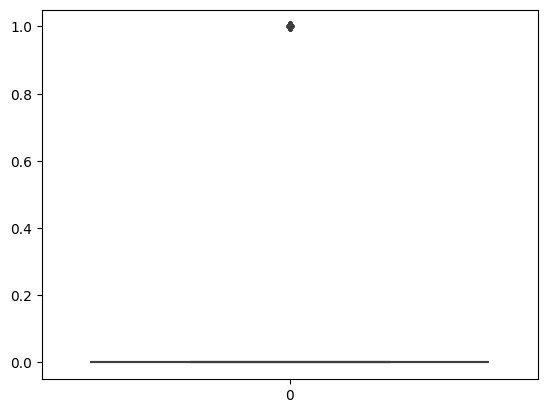

In [60]:
for col in sales_data.columns[1:]:
    sns.boxplot(sales_data[col])
    plt.show()

### 5.Item_Type

In [12]:
sales_data['Item_Type'].value_counts().to_dict()

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [13]:
sales_data = pd.get_dummies(sales_data,columns=['Item_Type'],drop_first=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


### 6.Item_MRP

### 7.Outlet_Identifier

In [25]:
sales_data['Outlet_Identifier'].value_counts().to_dict()

{'OUT027': 935,
 'OUT013': 932,
 'OUT049': 930,
 'OUT046': 930,
 'OUT035': 930,
 'OUT045': 929,
 'OUT018': 928,
 'OUT017': 926,
 'OUT010': 555,
 'OUT019': 528}

In [26]:
sales_data['Outlet_Identifier'].replace({'OUT027': 27,
 'OUT013': 13,
 'OUT049': 49,
 'OUT046': 46,
 'OUT035': 35,
 'OUT045': 45,
 'OUT018': 18,
 'OUT017': 17,
 'OUT010': 10,
 'OUT019': 19},inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,NaN,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,NaN,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


### 8.Outlet_Establishment_Year

### 9.Outlet_Size

In [39]:
sales_data['Outlet_Size'].isna().sum()

0

In [37]:
sales_data['Outlet_Size'].mode()[0]

'Medium'

In [38]:
sales_data['Outlet_Size'].fillna(sales_data['Outlet_Size'].mode()[0],inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,Medium,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,Small,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [40]:
sales_data['Outlet_Size'].value_counts().to_dict()

{'Medium': 5203, 'Small': 2388, 'High': 932}

In [41]:
sales_data['Outlet_Size'].replace({'Medium': 2, 'Small': 1, 'High': 3},inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,2,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,2,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,2,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,2,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,3,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,3,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,2,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,1,Tier 2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,2,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


### 10.Outlet_Location_Type

In [45]:
sales_data['Outlet_Location_Type'].isna().sum()

0

In [44]:
sales_data['Outlet_Location_Type'].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [46]:
sales_data['Outlet_Location_Type'].replace({'Tier 3': 3, 'Tier 2': 2, 'Tier 1': 1},inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,2,1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,2,3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,2,1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,2,3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,3,3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,3,3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,2,2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,1,2,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,2,3,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


### 11.Outlet_Type

In [47]:
sales_data['Outlet_Type'].value_counts().to_dict()

{'Supermarket Type1': 5577,
 'Grocery Store': 1083,
 'Supermarket Type3': 935,
 'Supermarket Type2': 928}

In [48]:
sales_data['Outlet_Type'].replace({'Supermarket Type1': 1,
 'Grocery Store': 0,
 'Supermarket Type3': 3,
 'Supermarket Type2': 2},inplace=True)
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,0,0.016047,249.8092,49,1999,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,1,0.019278,48.2692,18,2009,2,3,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,49,1999,2,1,1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,1,0.000000,182.0950,10,1998,2,3,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,13,1987,3,3,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,13,1987,3,3,1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,45,2002,2,2,1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,35,2004,1,2,1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,18,2009,2,3,2,...,0,0,0,0,0,0,0,1,0,0


In [65]:
sales_data.corr()['Item_Outlet_Sales']

C:\Users\arjma\AppData\Local\Temp\ipykernel_10560\3810734379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.corr()['Item_Outlet_Sales']


Item_Weight                        0.011550
Item_Fat_Content                   0.018719
Item_Visibility                   -0.072803
Item_MRP                           0.567574
Outlet_Identifier                  0.152660
Outlet_Establishment_Year         -0.049135
Outlet_Size                        0.086182
Outlet_Location_Type               0.089367
Outlet_Type                        0.401522
Item_Outlet_Sales                  1.000000
Item_Type_Breads                   0.002332
Item_Type_Breakfast               -0.004656
Item_Type_Canned                   0.007387
Item_Type_Dairy                    0.008858
Item_Type_Frozen Foods            -0.009482
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Hard Drinks             -0.003956
Item_Type_Health and Hygiene      -0.025587
Item_Type_Household                0.015701
Item_Type_Meat                    -0.002995
Item_Type_Others                  -0.021267
Item_Type_Seafood                  0.007380
Item_Type_Snack Foods           

In [67]:
x = sales_data.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,49,1999,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,18,2009,2,3,2,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,49,1999,2,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,10,1998,2,3,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,13,1987,3,3,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,13,1987,3,3,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,45,2002,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0,0.035186,85.1224,35,2004,1,2,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,1,0.145221,103.1332,18,2009,2,3,2,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
y= sales_data['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
x_train.shape

(6818, 24)

In [72]:
y_train.shape

(6818,)

In [73]:
x_test.shape

(1705, 24)

In [74]:
y_test.shape

(1705,)

In [76]:
lin_model = LinearRegression()
lin_model

LinearRegression()

In [77]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [80]:
def model_eval(algo,x,y):
    pred = algo.predict(x)
    
    MSE = mean_squared_error(y,pred)
    print('MSE :',MSE)
    
    MAE = mean_absolute_error(y,pred)
    print("MAE :",MAE)
    
    RMSE =np.sqrt(MSE)
    print("RMSE :",RMSE)
    
    r2 = r2_score(y,pred)
    print('R2 :',r2)
    
model_eval(lin_model,x_train,y_train)

MSE : 1381930.754165768
MAE : 882.0171274578054
RMSE : 1175.5555087556554
R2 : 0.5179919830446624


In [81]:
model_eval(lin_model,x_test,y_test)

MSE : 1556486.284867167
MAE : 938.9440350942057
RMSE : 1247.5921949367778
R2 : 0.4958054369106206


In [87]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(x_train,y_train)

Lasso(alpha=10)

In [88]:
model_eval(lasso_model,x_train,y_train)

MSE : 1387927.8939783422
MAE : 883.2601453652386
RMSE : 1178.1035158161367
R2 : 0.5159002216016604


In [89]:
model_eval(lasso_model,x_test,y_test)

MSE : 1557345.2617075879
MAE : 939.1309177228972
RMSE : 1247.9364013072093
R2 : 0.4955271874605801


In [94]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(x_train,y_train)

Ridge(alpha=10)

In [95]:
model_eval(ridge_model,x_train,y_train)

MSE : 1382232.1005397255
MAE : 882.0034437132372
RMSE : 1175.6836736723553
R2 : 0.5178868754857706


In [96]:
model_eval(ridge_model,x_test,y_test)

MSE : 1556113.0436370487
MAE : 938.8646881947903
RMSE : 1247.4426013396562
R2 : 0.49592634141249525
